# Electrical Motor Fault Analysis and Prediction

### Importing the required libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
train = pd.read_csv('train.csv')
train.head().style.background_gradient(cmap='coolwarm')

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.600000,309.600000,1596,36.100000,140,0,0,0,0,0,0
1,1,M20343,M,302.600000,312.100000,1759,29.100000,200,0,0,0,0,0,0
2,2,L49454,L,299.300000,308.500000,1805,26.500000,25,0,0,0,0,0,0
3,3,L53355,L,301.000000,310.900000,1524,44.300000,197,0,0,0,0,0,0
4,4,M24050,M,298.000000,309.000000,1641,35.400000,34,0,0,0,0,0,0


In [3]:
train.shape

(136429, 14)

* Dropping the Product ID column as we do not need it

In [4]:
train = train.drop(['Product ID'],axis=1)
train.head().style.background_gradient(cmap='coolwarm')

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L,300.600000,309.600000,1596,36.100000,140,0,0,0,0,0,0
1,1,M,302.600000,312.100000,1759,29.100000,200,0,0,0,0,0,0
2,2,L,299.300000,308.500000,1805,26.500000,25,0,0,0,0,0,0
3,3,L,301.000000,310.900000,1524,44.300000,197,0,0,0,0,0,0
4,4,M,298.000000,309.000000,1641,35.400000,34,0,0,0,0,0,0


#### missingno library is imported to deal with missing values in the dataset

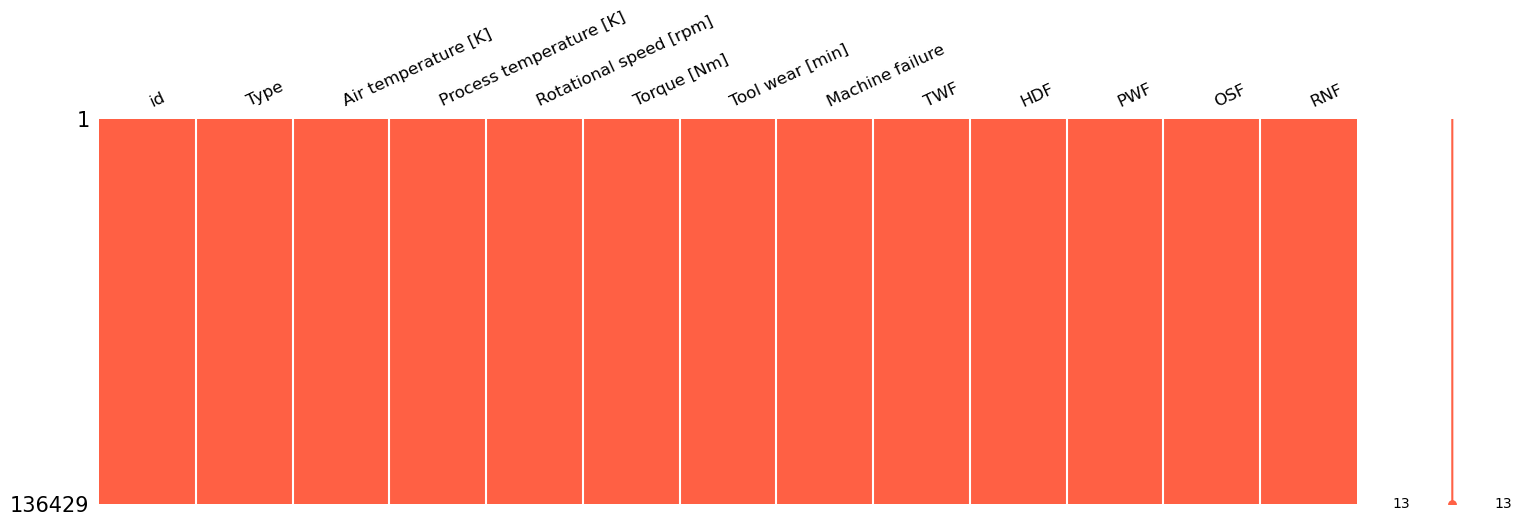

In [5]:
import missingno as msno
msno.matrix(train, figsize=(18,5), fontsize=12, color=(1, 0.38, 0.27));
plt.xticks(rotation=25);

In [6]:
train.isnull().sum()

id                         0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

* There are no null values in the dataset to treat

In [7]:
train.describe().style.background_gradient(cmap='Dark2') 

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Information of the Training dataset

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 13.5+ MB


#### The machine failure consists of five independent failure modes
* TWF - Tool wear failure
* HDF - Heat Dissipation Failure
* PWF - Power Failure
* OSF - Overstrain Failure
* RNF - Random Failure
  * If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1.

In [9]:
train1=train[train['Machine failure']==1][['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].apply(pd.value_counts)
train1

,TWF,HDF,PWF,OSF,RNF
0,1936,1450,1824,1612,2142
1,212,698,324,536,6


* Creating the Fault_Types labeled column which consists a binary string of length 5, where each binary digit indicating the each failure mode

In [10]:
train['Fault_Types'] = train['TWF'].astype('str') + train['HDF'].astype('str') + train['PWF'].astype('str') + train['OSF'].astype('str') + train['RNF'].astype('str')
train.head()

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Fault_Types
0,0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,00000
1,1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,00000
2,2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,00000
3,3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,00000
4,4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,00000


### Feature Engineering 

* Converting the binary string into a meaningful string 

In [11]:
train['Fault_Types'][train['Fault_Types'] == '00000'] = 'No_Fault'     
train['Fault_Types'][train['Fault_Types'] == '10000'] = 'TWF_Fault'
train['Fault_Types'][train['Fault_Types'] == '01000'] = 'HDF_Fault'
train['Fault_Types'][train['Fault_Types'] == '00100'] = 'PWF_Faultt'
train['Fault_Types'][train['Fault_Types'] == '00010'] = 'OSF_Fault'
train['Fault_Types'][train['Fault_Types'] == '00001'] = 'RNF_Fault'
train['Fault_Types'][train['Fault_Types'] == '11000'] = 'TWF_HDF_Fault'
train['Fault_Types'][train['Fault_Types'] == '01100'] = 'HDF_PWF_Fault'
train['Fault_Types'][train['Fault_Types'] == '00110'] = 'PWF_OSF_Fault'
train['Fault_Types'][train['Fault_Types'] == '00011'] = 'OSF_RNF_Fault'
train['Fault_Types'][train['Fault_Types'] == '11100'] = 'TWF_HDF_PWF_Fault'
train['Fault_Types'][train['Fault_Types'] == '01110'] = 'HDF_PWF_OSF_Fault'
train['Fault_Types'][train['Fault_Types'] == '00111'] = 'PWF_OSF_RNF_Fault'
train['Fault_Types'][train['Fault_Types'] == '11110'] = 'TWF_HDF_PWF_OSF_Fault'
train['Fault_Types'][train['Fault_Types'] == '01111'] = 'HDF_PWF_OSF_RNF_Fault'
train['Fault_Types'][train['Fault_Types'] == '11111'] = 'TWF_HDF_PWF_OSF_RNF_Fault'
train['Fault_Types'][train['Fault_Types'] == '10010'] = 'TWF_OSF_Fault'
train['Fault_Types'][train['Fault_Types'] == '10001'] = 'TWF_RNF_Fault'
train['Fault_Types'][train['Fault_Types'] == '10011'] = 'TWF_OSF_RNF_Fault'
train['Fault_Types'][train['Fault_Types'] == '10100'] = 'TWF_PWF_Fault'
train['Fault_Types'][train['Fault_Types'] == '01010'] = 'HDF_OSF_Fault'
train['Fault_Types'][train['Fault_Types'] == '01001'] = 'HDF_RNF_Fault'
train['Fault_Types'][train['Fault_Types'] == '11010'] = 'TWF_HDF_OSF_Fault'
train['Fault_Types'][train['Fault_Types'] == '00101'] = 'PWF_RNF_Fault'
train['Fault_Types'][train['Fault_Types'] == '10110'] = 'TWF_PWF_OSF_Fault'
train['Fault_Types'][train['Fault_Types'] == '11101'] = 'TWF_HDF_PWF_Fault'
train['Fault_Types'][train['Fault_Types'] == '11001'] = 'TWF_HDF_RNF_Fault'
train['Fault_Types'][train['Fault_Types'] == '10111'] = 'TWF_PWF_OSF_RNF_Fault'
train['Fault_Types'][train['Fault_Types'] == '10101'] = 'TWF_PWF_RNF_Fault'
train['Fault_Types'][train['Fault_Types'] == '10110'] = 'TWF_PWF_OSF_Fault'

In [12]:
train.head()

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Fault_Types
0,0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,No_Fault
1,1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,No_Fault
2,2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,No_Fault
3,3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,No_Fault
4,4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,No_Fault


In [13]:
print("Unique Fault Types :", train['Fault_Types'].nunique())
train['Fault_Types'].value_counts().nlargest(20).to_frame().style.background_gradient(cmap='Dark2').set_precision(2)

Unique Fault Types : 20


,Fault_Types
No_Fault,134473
HDF_Fault,634
OSF_Fault,448
RNF_Fault,303
PWF_Faultt,257
TWF_Fault,185
HDF_OSF_Fault,40
PWF_OSF_Fault,35
HDF_PWF_Fault,20
TWF_OSF_Fault,11


* There are a total of 20 unique fault types and they are depicted in the descending order of their occurrences 

## Data Visualization 

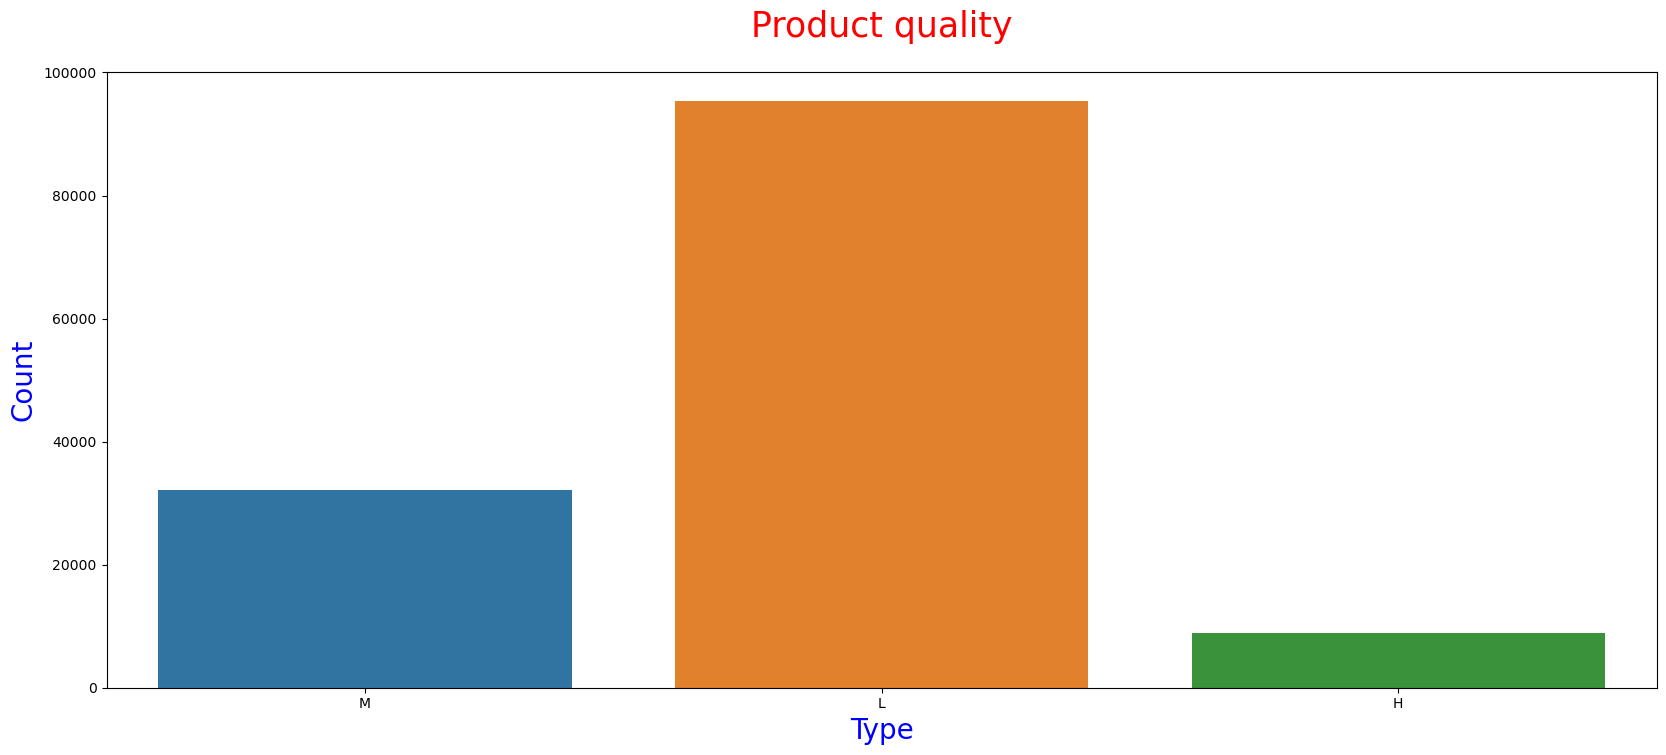

In [14]:
plt.figure(figsize = (20, 8))
s = sns.countplot(x = train['Type'].sort_values(ascending=False),data = train)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train)*100),
            ha="center", fontsize=18,color = "white") 
    plt.xticks(rotation=0)
    plt.title('Product quality',fontsize = 25, pad = 25, color = 'Red')
    plt.xlabel('Type',fontsize = 20, color ='Blue')
    plt.ylabel('Count',fontsize = 20, color ='Blue');

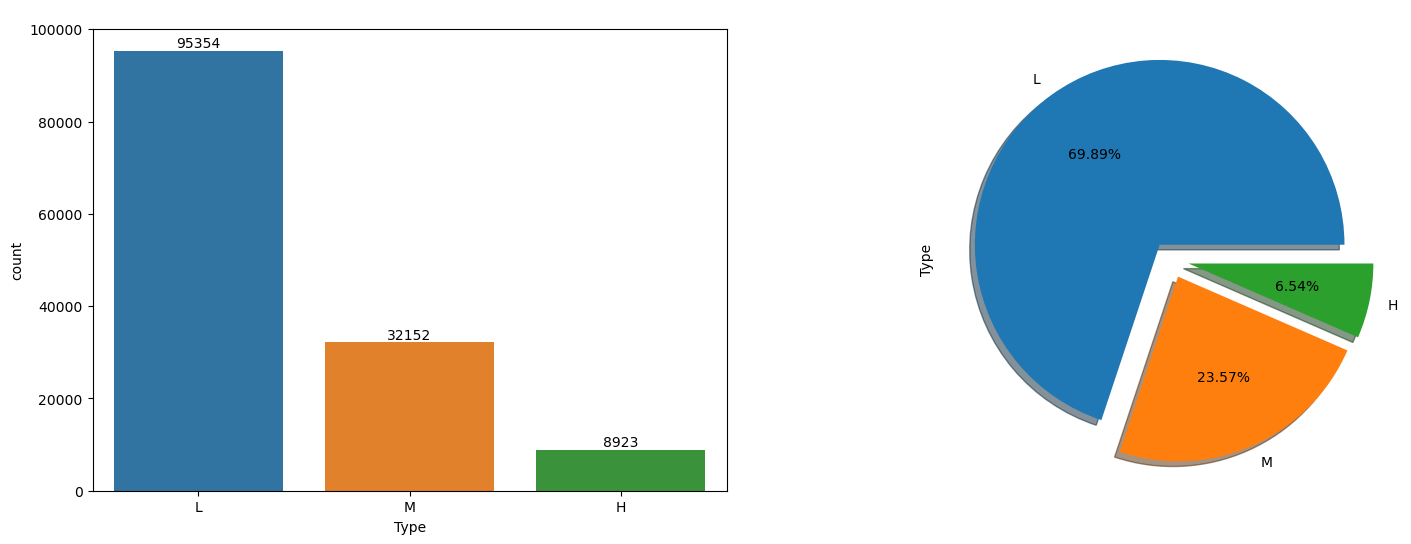

In [15]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=train)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='white',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=train['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='white',font='Times New Roman');

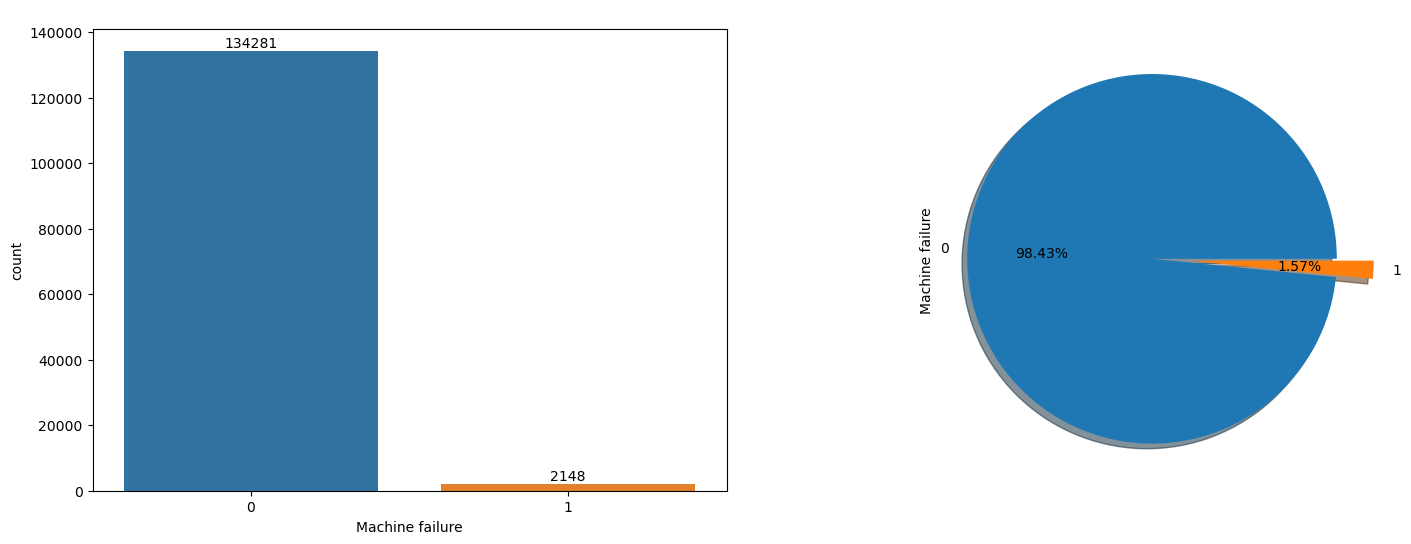

In [16]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Machine failure', data=train)
ax.bar_label(ax.containers[0])
plt.title("Machine failure", fontsize=20,color='white',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=train['Machine failure'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Machine failure", fontsize = 20,color='white',font='Times New Roman');

### Depicting the occurances of each Fault_Types in accordance with various factors

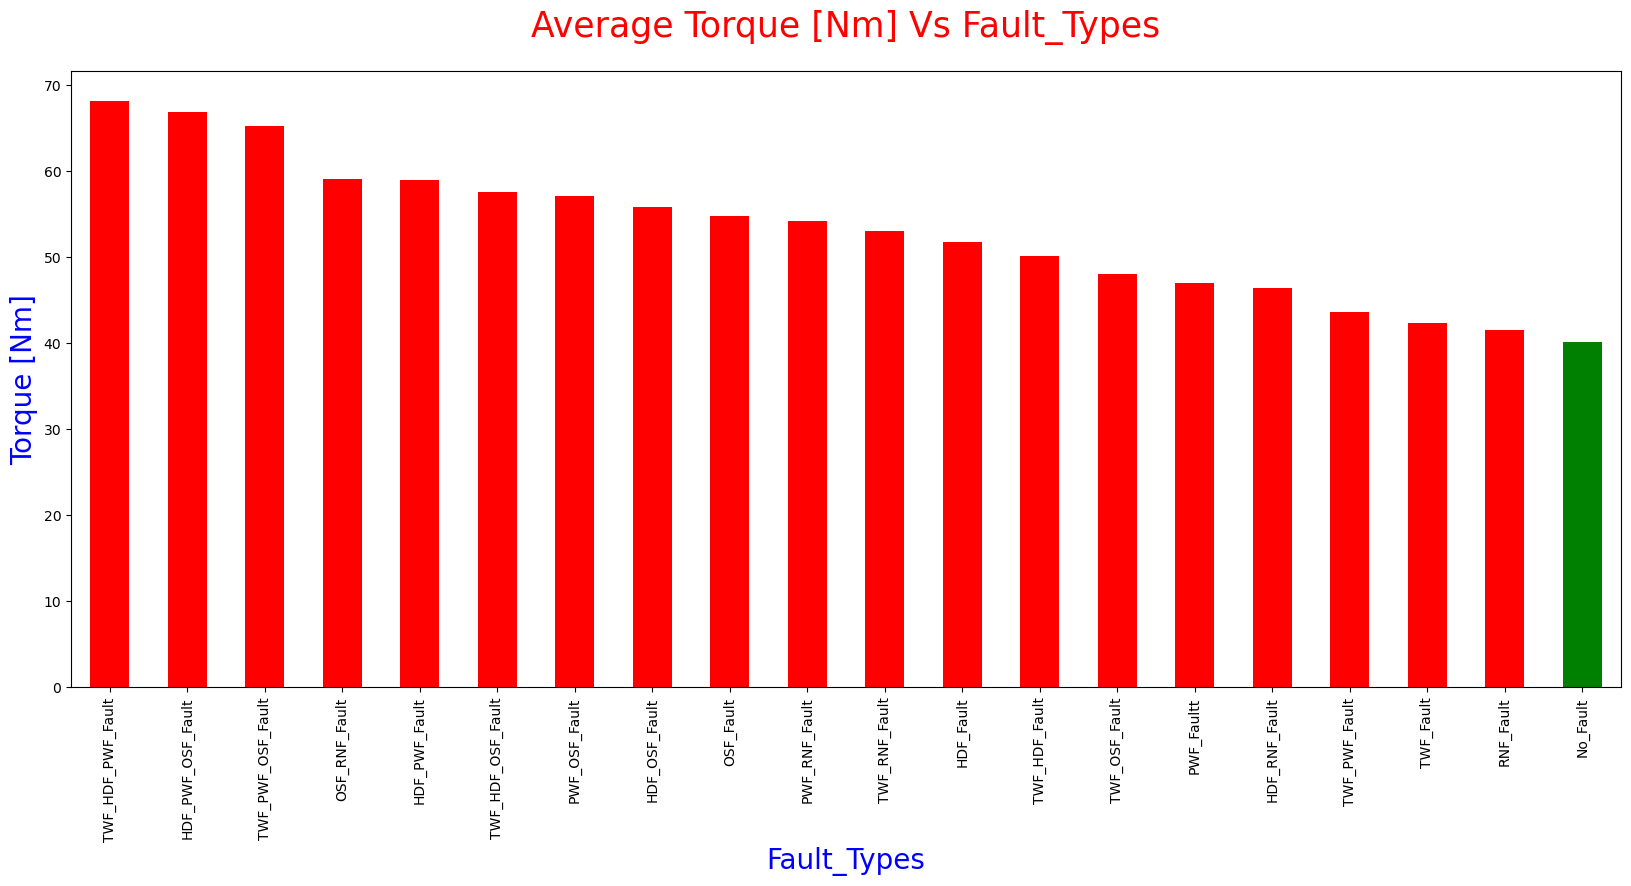

In [17]:
plt.figure(figsize = (20,8))
df2=train.groupby('Fault_Types')['Torque [Nm]'].mean().sort_values(ascending=False)
color = [('g' if i < 41 else 'r') for i in df2]
df2.plot.bar(color=color);
plt.title('Average Torque [Nm] Vs Fault_Types',fontsize = 25, pad = 25, color = 'Red')
plt.xlabel('Fault_Types',fontsize = 20, color ='Blue')
plt.ylabel('Torque [Nm]',fontsize = 20, color ='Blue');

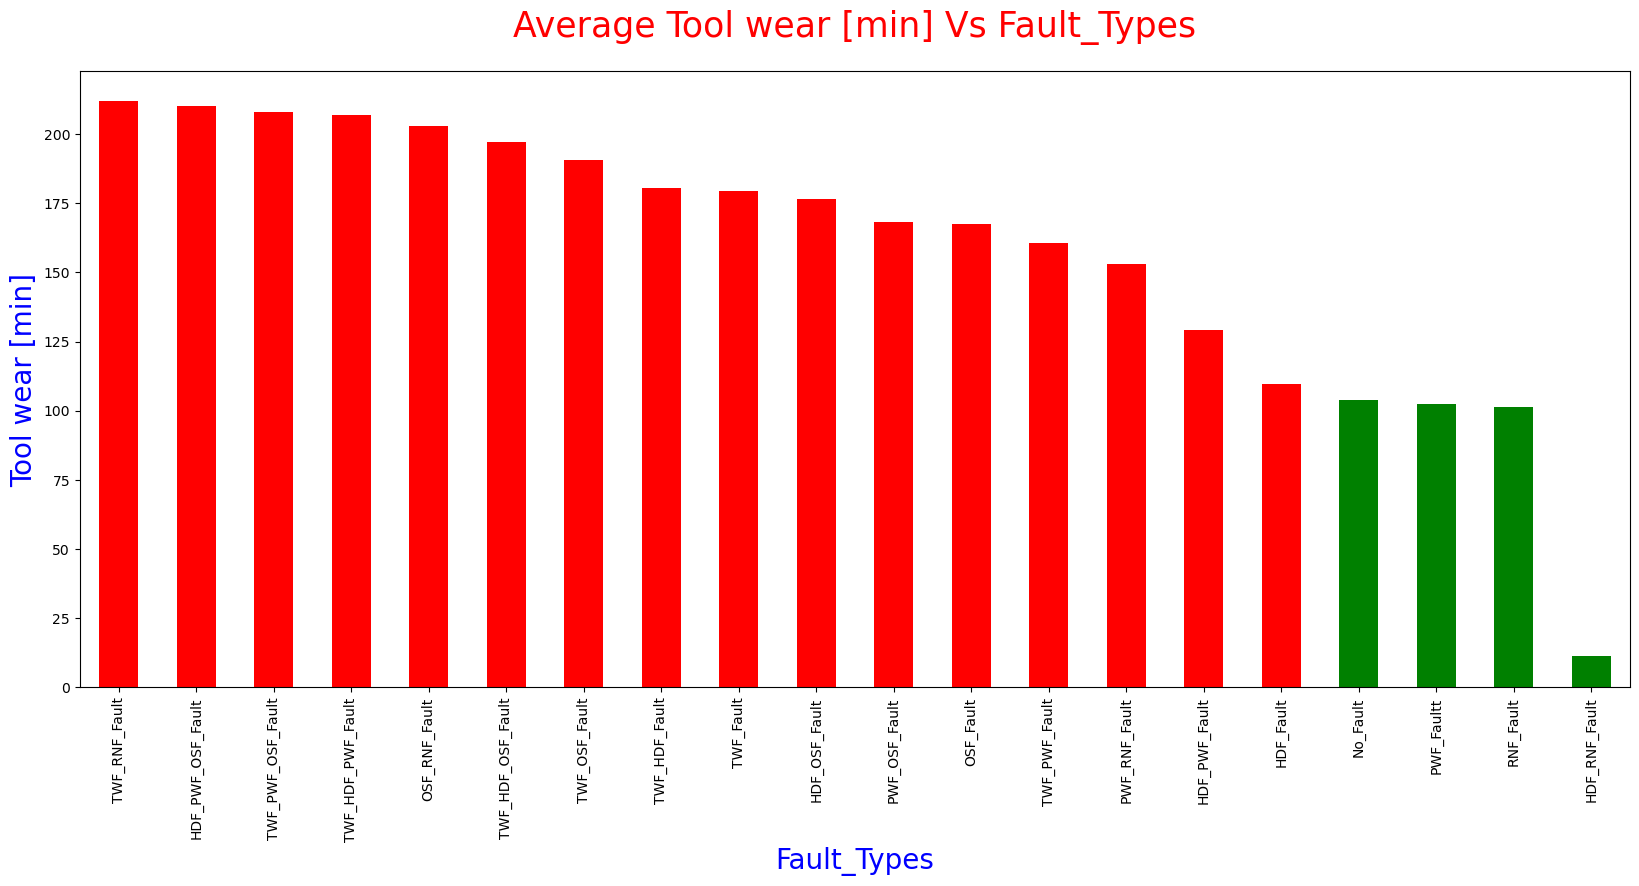

In [18]:
plt.figure(figsize = (20,8))
df2=train.groupby('Fault_Types')['Tool wear [min]'].mean().sort_values(ascending=False)
color = [('g' if i < 105 else 'r') for i in df2]
df2.plot.bar(color=color);
plt.title('Average Tool wear [min] Vs Fault_Types',fontsize = 25, pad = 25, color = 'Red')
plt.xlabel('Fault_Types',fontsize = 20, color ='Blue')
plt.ylabel('Tool wear [min]',fontsize = 20, color ='Blue');

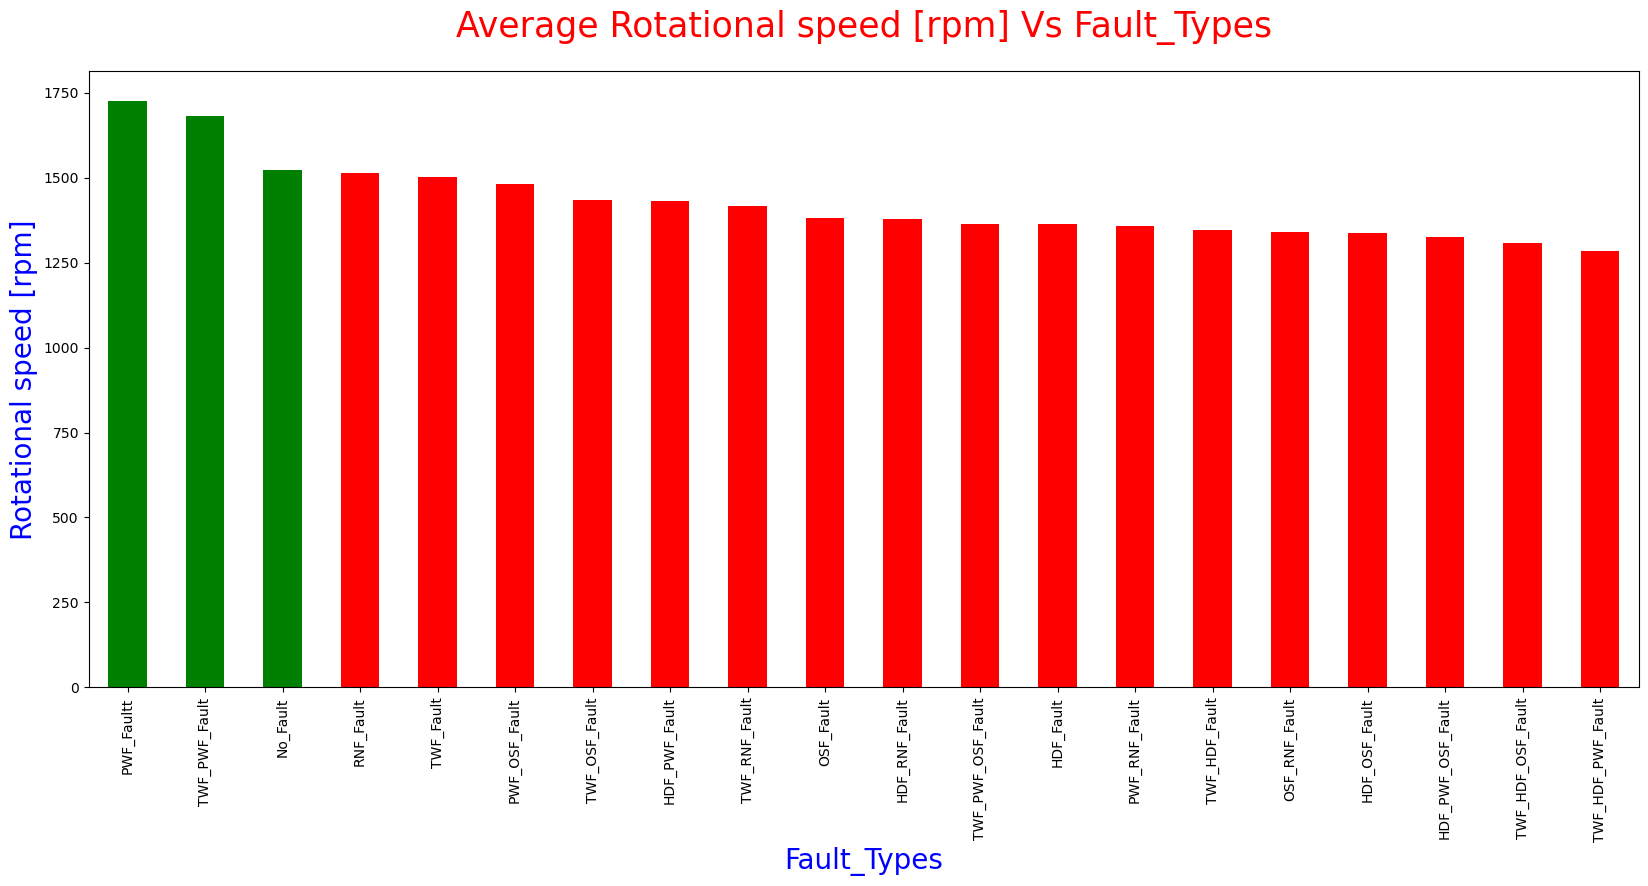

In [19]:
plt.figure(figsize = (20,8))
df2=train.groupby('Fault_Types')['Rotational speed [rpm]'].mean().sort_values(ascending=False)
color = [('r' if i < 1515 else 'g') for i in df2]
df2.plot.bar(color=color);
plt.title('Average Rotational speed [rpm] Vs Fault_Types',fontsize = 25, pad = 25, color = 'Red')
plt.xlabel('Fault_Types',fontsize = 20, color ='Blue')
plt.ylabel('Rotational speed [rpm]',fontsize = 20, color ='Blue');

### Grouping by the Fault_Type and depicting the behaviour of Torque, Tool wear and Rotational speed values

* Sorting values by Torque values

In [20]:
train.reset_index().groupby('Fault_Types')[['Torque [Nm]', 'Tool wear [min]','Rotational speed [rpm]']].agg('mean').sort_values(ascending=False,by='Torque [Nm]').style.background_gradient(cmap='Dark2').set_precision(2)

,Torque [Nm],Tool wear [min],Rotational speed [rpm]
Fault_Types,,,
TWF_HDF_PWF_Fault,68.20,207.00,1284.00
HDF_PWF_OSF_Fault,66.90,210.00,1324.33
TWF_PWF_OSF_Fault,65.30,208.00,1364.00
OSF_RNF_Fault,59.10,203.00,1339.00
HDF_PWF_Fault,59.03,129.20,1431.55
TWF_HDF_OSF_Fault,57.60,197.00,1308.00
PWF_OSF_Fault,57.16,168.09,1480.89
HDF_OSF_Fault,55.80,176.55,1335.75
OSF_Fault,54.83,167.30,1381.77


* Sorting values by Tool wear values

In [21]:
train.reset_index().groupby('Fault_Types')[['Torque [Nm]', 'Tool wear [min]','Rotational speed [rpm]']].agg('mean').sort_values(ascending=False,by='Tool wear [min]').style.background_gradient(cmap='Dark2').set_precision(2)

,Torque [Nm],Tool wear [min],Rotational speed [rpm]
Fault_Types,,,
TWF_RNF_Fault,53.10,212.00,1415.00
HDF_PWF_OSF_Fault,66.90,210.00,1324.33
TWF_PWF_OSF_Fault,65.30,208.00,1364.00
TWF_HDF_PWF_Fault,68.20,207.00,1284.00
OSF_RNF_Fault,59.10,203.00,1339.00
TWF_HDF_OSF_Fault,57.60,197.00,1308.00
TWF_OSF_Fault,48.12,190.73,1432.73
TWF_HDF_Fault,50.20,180.33,1346.00
TWF_Fault,42.33,179.46,1501.17


* Sorting values by Rotational speed values

In [22]:
train.reset_index().groupby('Fault_Types')[['Torque [Nm]', 'Tool wear [min]','Rotational speed [rpm]']].agg('mean').sort_values(ascending=False,by='Rotational speed [rpm]').style.background_gradient(cmap='Dark2').set_precision(2)

,Torque [Nm],Tool wear [min],Rotational speed [rpm]
Fault_Types,,,
PWF_Faultt,47.02,102.28,1725.74
TWF_PWF_Fault,43.60,160.44,1680.67
No_Fault,40.21,104.02,1521.28
RNF_Fault,41.61,101.35,1512.65
TWF_Fault,42.33,179.46,1501.17
PWF_OSF_Fault,57.16,168.09,1480.89
TWF_OSF_Fault,48.12,190.73,1432.73
HDF_PWF_Fault,59.03,129.20,1431.55
TWF_RNF_Fault,53.10,212.00,1415.00


### Correlation

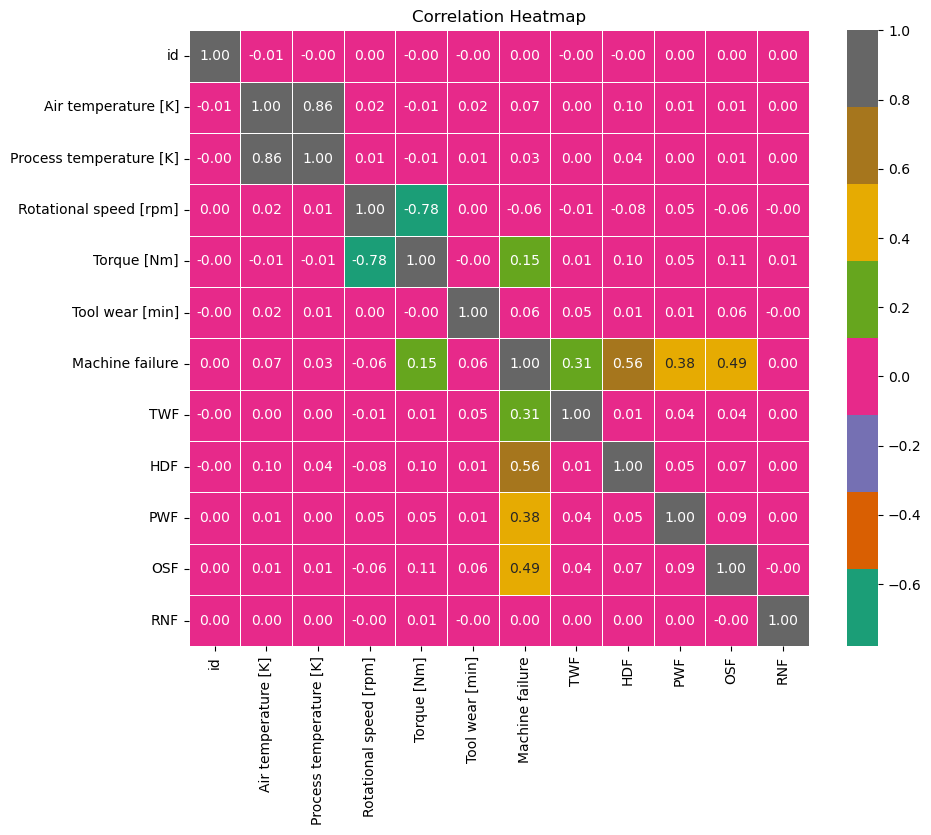

In [23]:
# Compute the correlation matrix
corr_matrix = train.corr()
# Generate a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Dark2', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Scatter Plot

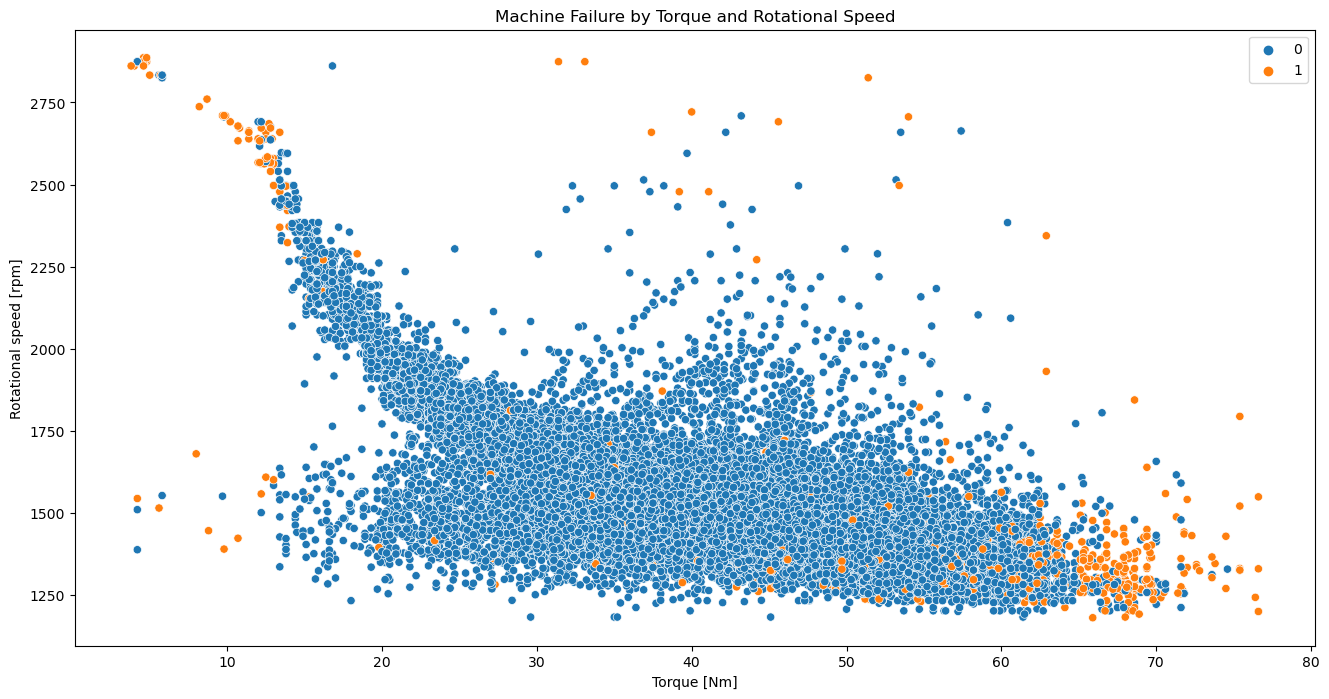

In [24]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Torque [Nm]', y='Rotational speed [rpm]', hue='Machine failure', data=train)
plt.xlabel('Torque [Nm]')
plt.ylabel('Rotational speed [rpm]')
plt.title('Machine Failure by Torque and Rotational Speed')
plt.legend()
plt.show()

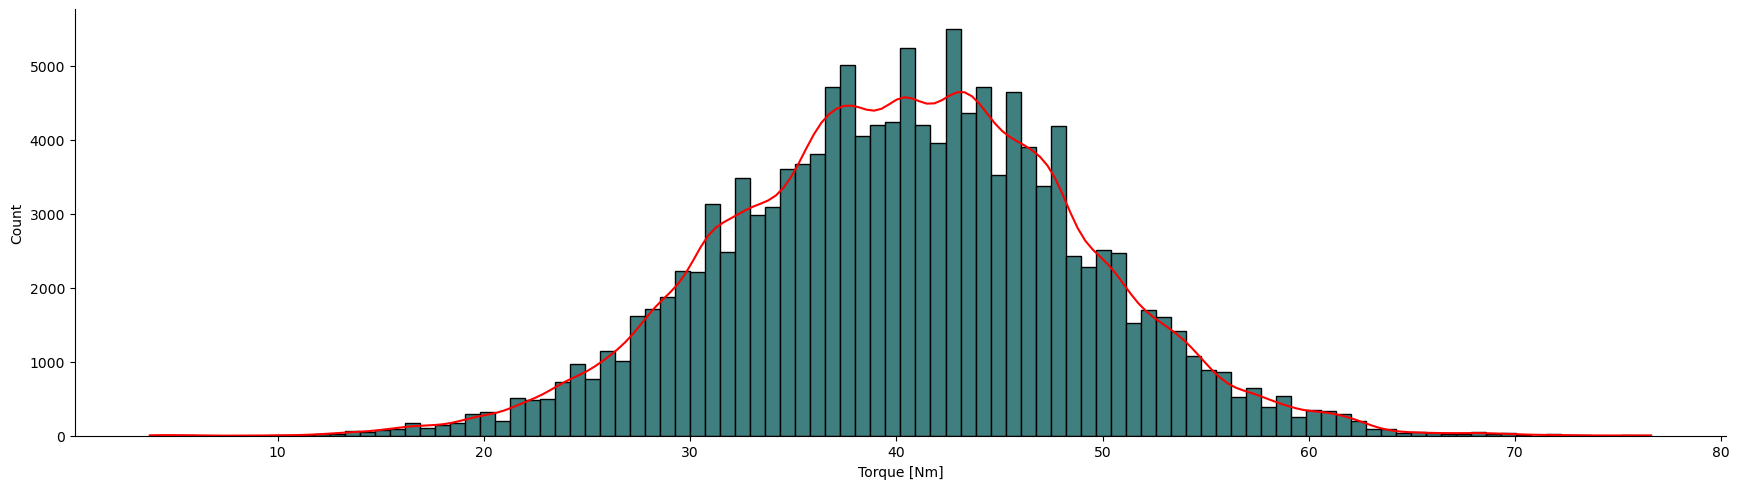

In [25]:
sns.displot(data=train, x="Torque [Nm]", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

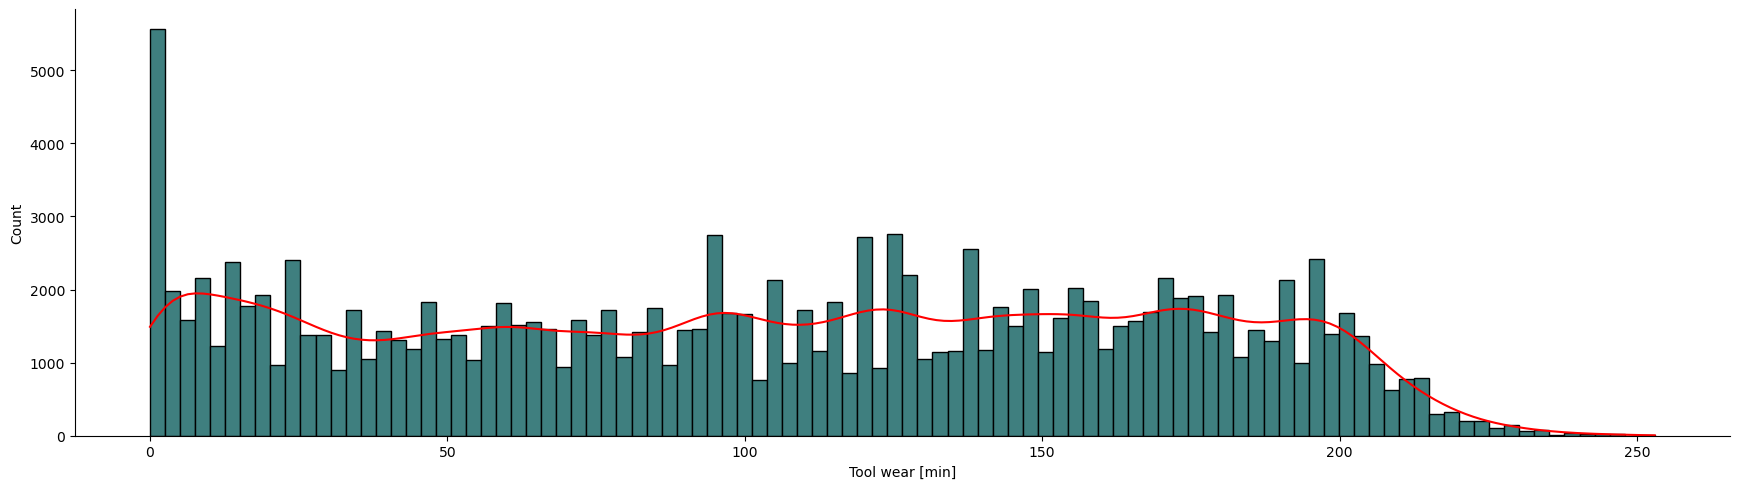

In [26]:
sns.displot(data=train, x="Tool wear [min]", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

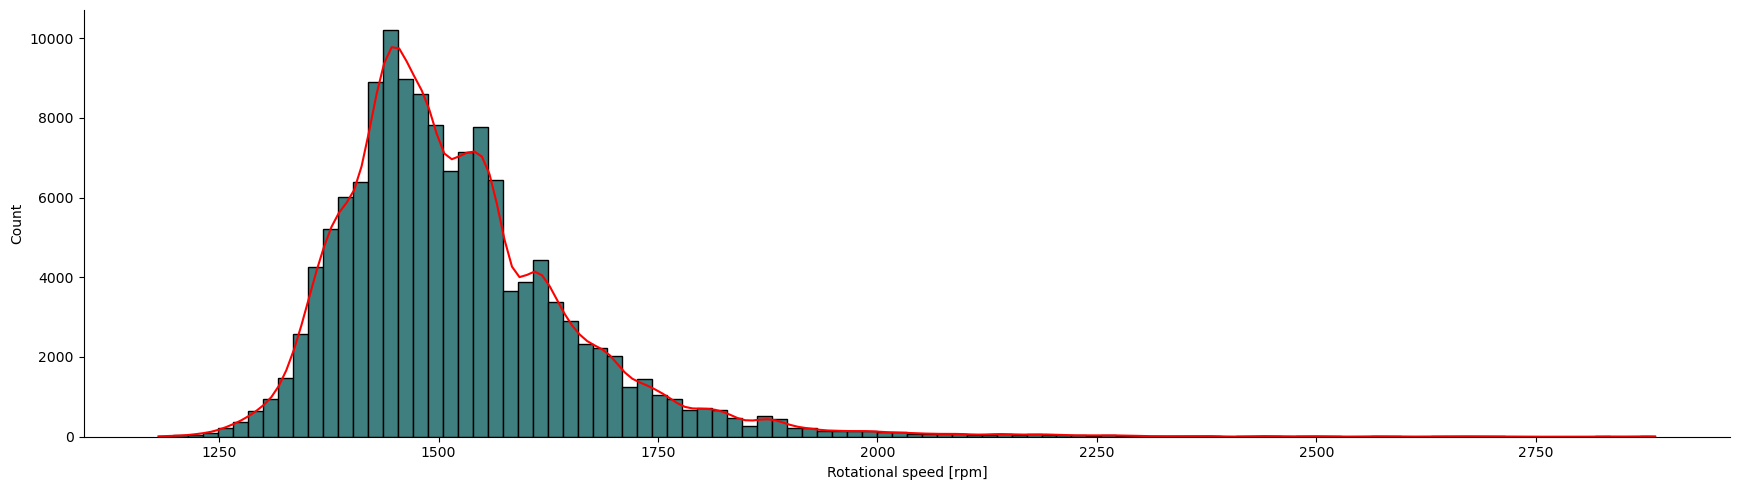

In [27]:
sns.displot(data=train, x="Rotational speed [rpm]", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

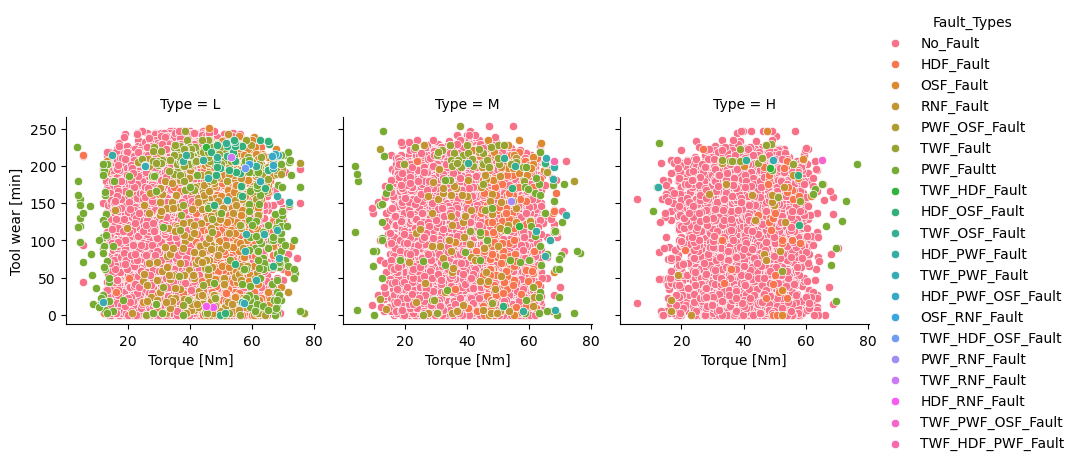

In [28]:
g = sns.FacetGrid(train, col="Type", hue="Fault_Types")
g.map_dataframe(sns.scatterplot, x="Torque [Nm]", y="Tool wear [min]")
g.add_legend()
plt.show()

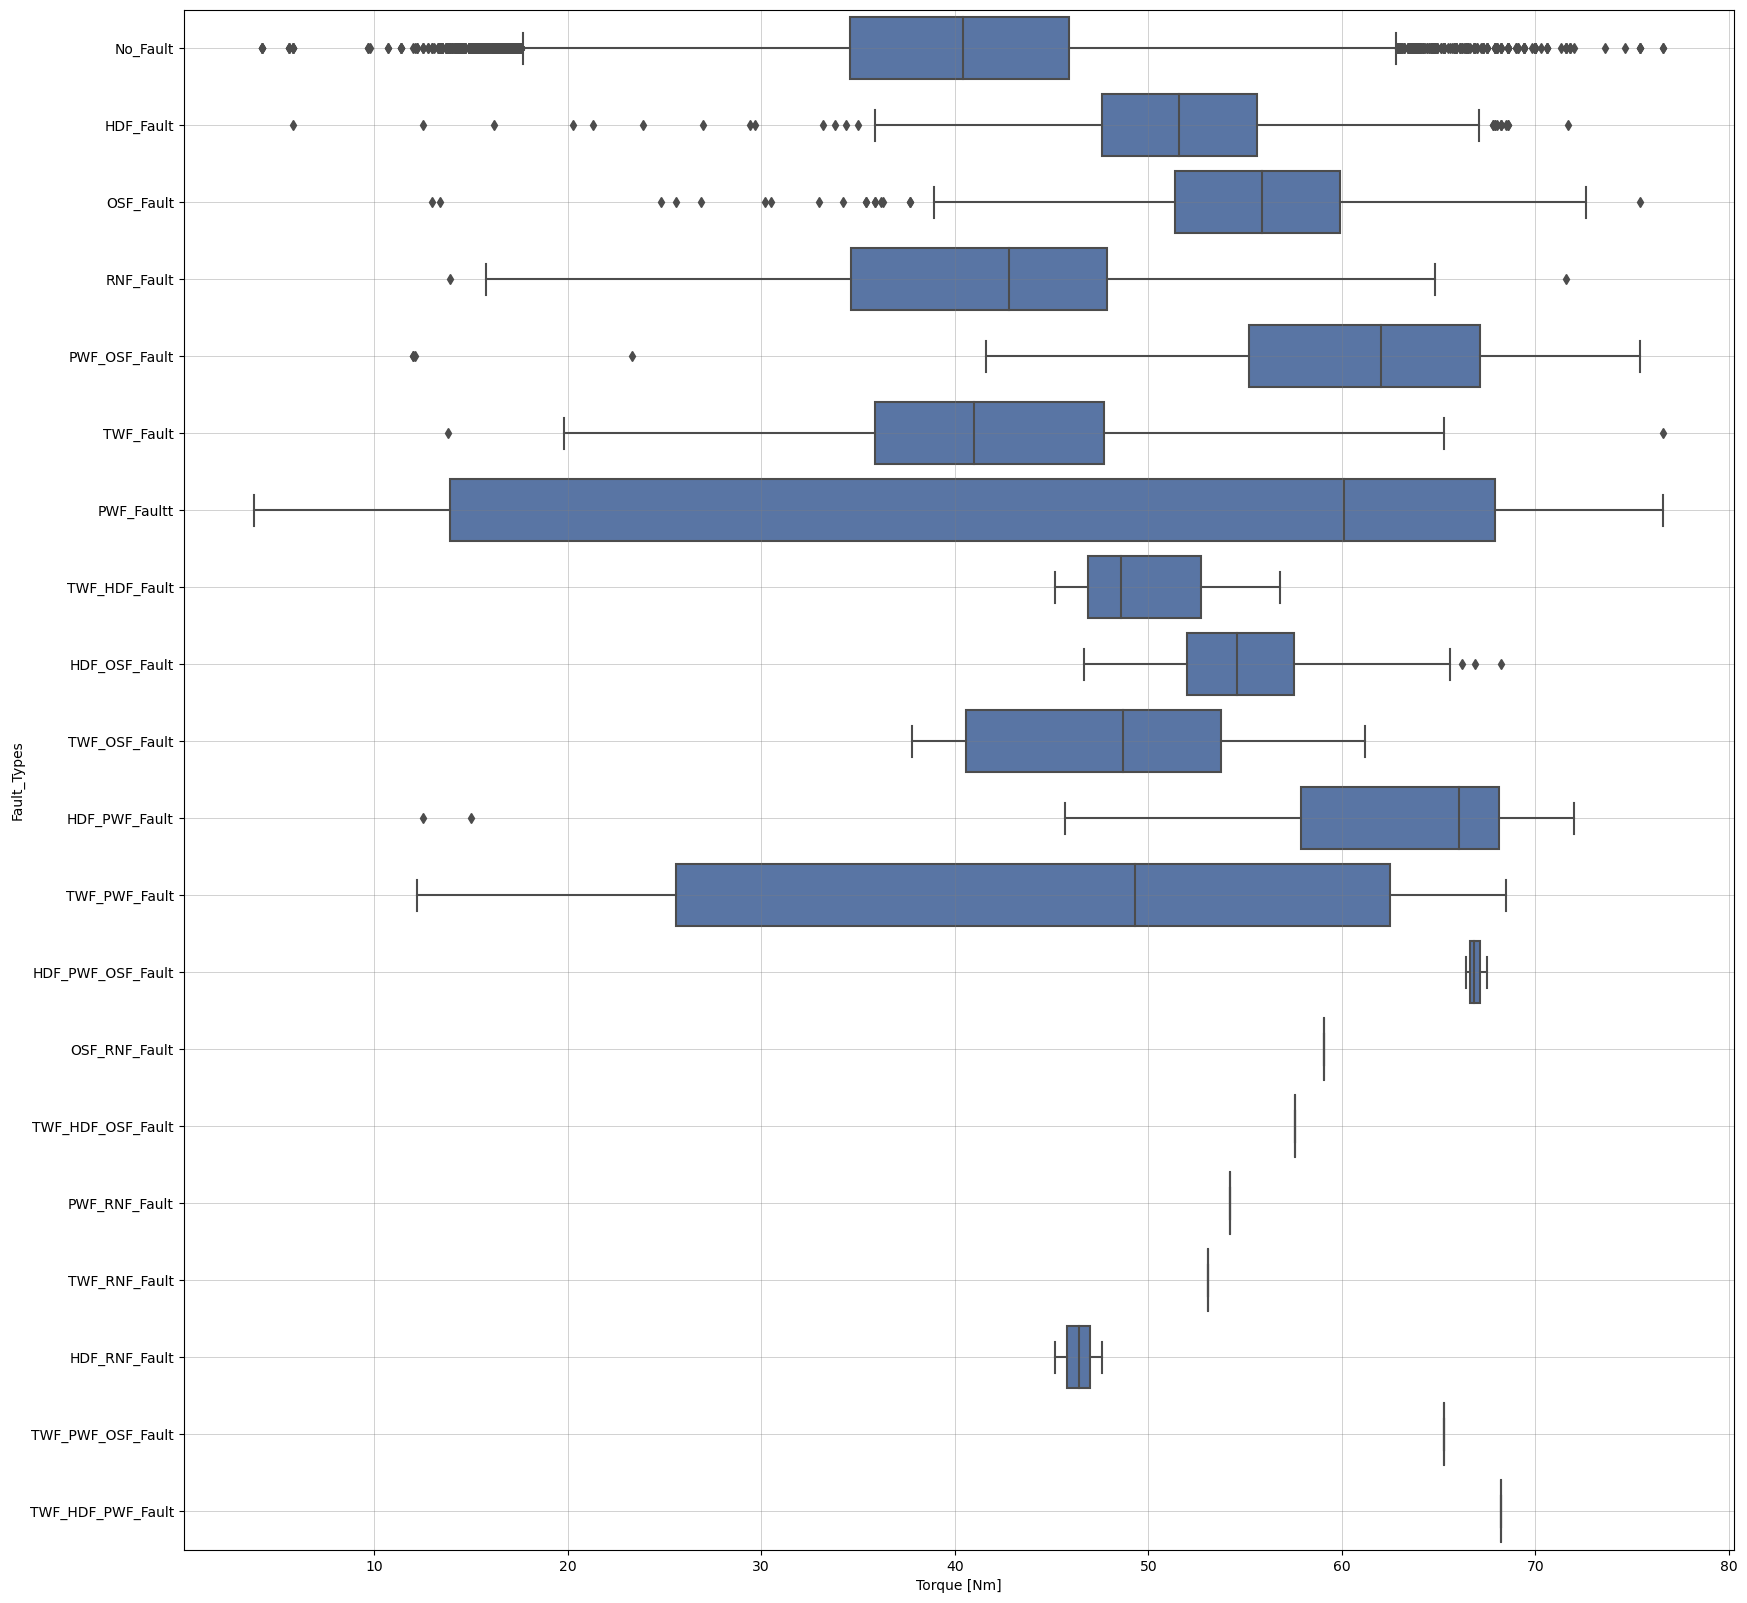

In [29]:
fig = plt.figure(figsize=(20,20))
sns.boxplot(data=train, y="Fault_Types", x="Torque [Nm]",color="#4C72B0")
plt.grid(True, color = "grey", linewidth = "0.5", alpha=0.5, axis="both")
plt.show()

In [30]:
train['Torque [Nm] Range'] = pd.cut(train['Torque [Nm]'],
bins=[0,10,20,30,40,50,60,70,80],
labels=['Very Low','Low','Medium',"Average",'High',"Moderate High","Very High","Extreme High"])
train['Torque [Nm] Range'].value_counts(ascending = False).to_frame().style.background_gradient(cmap='Dark2').set_precision(2)

,Torque [Nm] Range
High,54583
Average,50096
Moderate High,14819
Medium,13986
Very High,1556
Low,1293
Extreme High,57
Very Low,39


In [31]:
train['Tool wear [min] Range'] = pd.cut(train['Tool wear [min]'],
bins=[0,40,80,120,160,200,230,245,260],
labels=['Very Low','Low','Medium',"Average",'High',"Moderate High","Very High","Extreme High"])
train['Tool wear [min] Range'].value_counts(ascending = False).to_frame().style.background_gradient(cmap='Dark2').set_precision(2)

,Tool wear [min] Range
Average,26492
Very Low,26000
High,25623
Medium,24458
Low,22625
Moderate High,7171
Very High,241
Extreme High,29


In [32]:
train['Rotational speed [rpm] Range'] = pd.cut(train['Rotational speed [rpm]'],
bins=[1100,1200,1300,1400,1500,1700,2000,2500,2900],
labels=['Very Low','Low','Medium',"Average",'High',"Moderate High","Very High","Extreme High"])
train['Rotational speed [rpm] Range'].value_counts(ascending = False).to_frame().style.background_gradient(cmap='Dark2').set_precision(2)

,Rotational speed [rpm] Range
High,53026
Average,50359
Medium,19737
Moderate High,10558
Low,1437
Very High,1185
Extreme High,114
Very Low,13


In [33]:
pd.crosstab(train['Fault_Types'],train['Rotational speed [rpm] Range'])[:20].style.background_gradient(cmap='Dark2').set_precision(2)

Rotational speed [rpm] Range,Very Low,Low,Medium,Average,High,Moderate High,Very High,Extreme High
Fault_Types,,,,,,,,
HDF_Fault,0,44,562,13,7,5,1,2
HDF_OSF_Fault,0,9,30,1,0,0,0,0
HDF_PWF_Fault,0,6,11,1,0,0,1,1
HDF_PWF_OSF_Fault,0,1,1,1,0,0,0,0
HDF_RNF_Fault,0,0,2,0,0,0,0,0
No_Fault,10,1266,18623,50046,52818,10500,1160,50
OSF_Fault,1,50,300,70,20,4,2,1
OSF_RNF_Fault,0,0,1,0,0,0,0,0
PWF_Faultt,1,41,82,39,15,10,13,56


In [34]:
pd.crosstab(train['Fault_Types'],train['Tool wear [min] Range'])[:20].style.background_gradient(cmap='Dark2').set_precision(2)

Tool wear [min] Range,Very Low,Low,Medium,Average,High,Moderate High,Very High,Extreme High
Fault_Types,,,,,,,,
HDF_Fault,124,92,125,93,116,69,2,0
HDF_OSF_Fault,3,2,0,3,12,15,4,0
HDF_PWF_Fault,1,3,6,4,5,1,0,0
HDF_PWF_OSF_Fault,0,0,0,0,0,3,0,0
HDF_RNF_Fault,2,0,0,0,0,0,0,0
No_Fault,25696,22405,24183,26258,25198,6739,214,24
OSF_Fault,37,22,27,31,134,176,13,2
OSF_RNF_Fault,0,0,0,0,0,1,0,0
PWF_Faultt,52,45,57,33,45,19,1,1


In [35]:
pd.crosstab(train['Fault_Types'],train['Torque [Nm] Range'])[:20].style.background_gradient(cmap='Dark2').set_precision(2)

Torque [Nm] Range,Very Low,Low,Medium,Average,High,Moderate High,Very High,Extreme High
Fault_Types,,,,,,,,
HDF_Fault,1,2,6,9,244,292,79,1
HDF_OSF_Fault,0,0,0,0,8,23,9,0
HDF_PWF_Fault,0,2,0,0,1,3,12,2
HDF_PWF_OSF_Fault,0,0,0,0,0,0,3,0
HDF_RNF_Fault,0,0,0,0,2,0,0,0
No_Fault,14,1226,13916,49912,54045,14135,1204,21
OSF_Fault,0,2,3,14,75,244,108,2
OSF_RNF_Fault,0,0,0,0,0,1,0,0
PWF_Faultt,24,49,9,8,9,29,102,27


In [36]:
train.pivot_table(index="Fault_Types")[:20].sort_values(by="Torque [Nm]",ascending=False).style.background_gradient(cmap='Dark2').set_precision(2)

,Air temperature [K],HDF,Machine failure,OSF,PWF,Process temperature [K],RNF,Rotational speed [rpm],TWF,Tool wear [min],Torque [Nm],id
Fault_Types,,,,,,,,,,,,
TWF_HDF_PWF_Fault,301.70,1,1.00,0,1,309.80,0,1284.00,1,207.00,68.20,117668.00
HDF_PWF_OSF_Fault,302.53,1,1.00,1,1,310.50,0,1324.33,0,210.00,66.90,73117.67
TWF_PWF_OSF_Fault,300.80,0,1.00,1,1,310.20,0,1364.00,1,208.00,65.30,111275.00
OSF_RNF_Fault,300.80,0,1.00,1,0,310.90,1,1339.00,0,203.00,59.10,78026.00
HDF_PWF_Fault,302.10,1,1.00,0,1,310.44,0,1431.55,0,129.20,59.03,77063.60
TWF_HDF_OSF_Fault,302.00,1,1.00,1,0,309.90,0,1308.00,1,197.00,57.60,82009.00
PWF_OSF_Fault,299.83,0,1.00,1,1,309.88,0,1480.89,0,168.09,57.16,79349.14
HDF_OSF_Fault,302.72,1,1.00,1,0,310.84,0,1335.75,0,176.55,55.80,75686.90
OSF_Fault,299.88,0,0.99,1,0,310.01,0,1381.77,0,167.30,54.83,68106.64


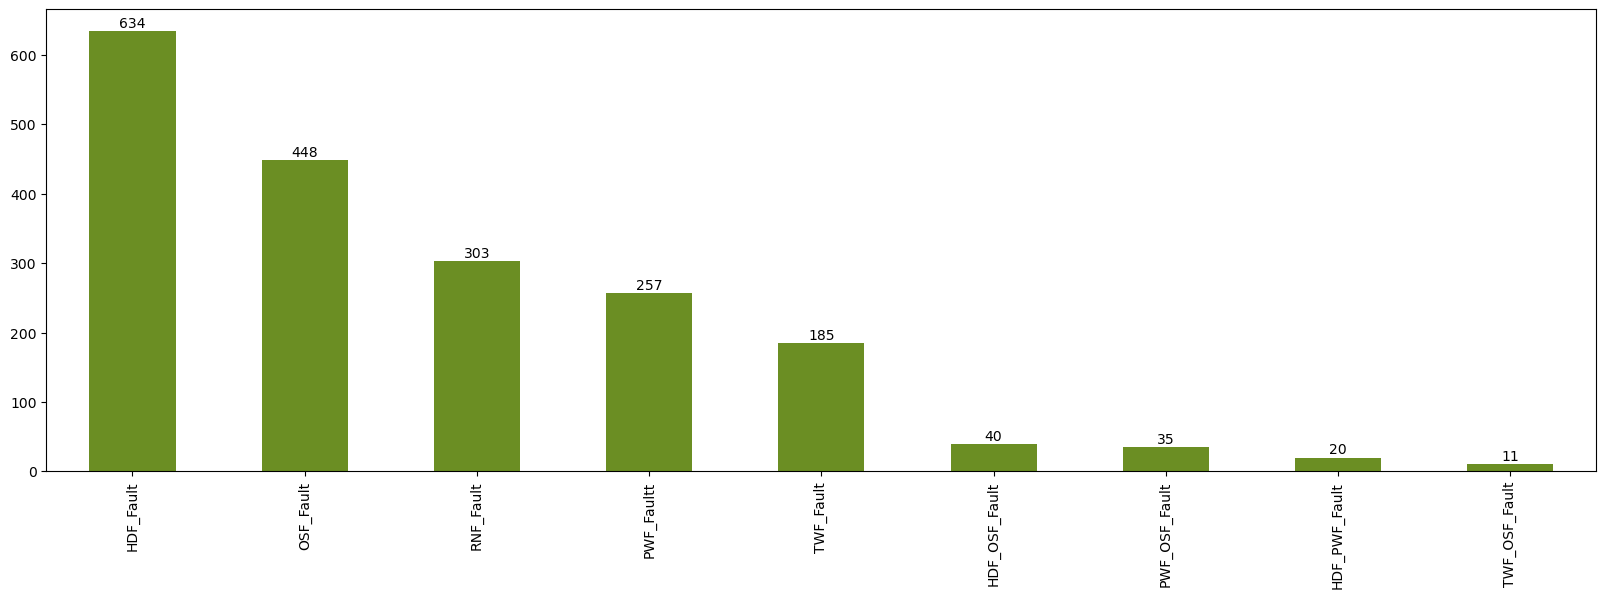

In [37]:
plt.figure(figsize = (20, 6))
ax = train['Fault_Types'].value_counts()[1:10].plot(kind = 'bar', color = 'olivedrab')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

In [38]:
train.head()

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Fault_Types,Torque [Nm] Range,Tool wear [min] Range,Rotational speed [rpm] Range
0,0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,No_Fault,Average,Average,High
1,1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,No_Fault,Medium,High,Moderate High
2,2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,No_Fault,Medium,Very Low,Moderate High
3,3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,No_Fault,High,High,High
4,4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,No_Fault,Average,Very Low,High


In [39]:
train.columns = train.columns.str.replace('[\[\]]', '', regex=True)
train.head(2)

,id,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure,TWF,HDF,PWF,OSF,RNF,Fault_Types,Torque Nm Range,Tool wear min Range,Rotational speed rpm Range
0,0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,No_Fault,Average,Average,High
1,1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,No_Fault,Medium,High,Moderate High


In [40]:
train = train.drop(['Fault_Types','Torque Nm Range','Tool wear min Range','Rotational speed rpm Range'],axis=1)
train.head()

,id,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [41]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['Type'] = encoder.fit_transform(train['Type'])
train.head()

,id,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,1,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [42]:
X = train.drop(['Machine failure'],axis=1)
y = train['Machine failure']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=41)

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
from sklearn.metrics import accuracy_score
acc_score1=accuracy_score(y_test,y_pred1)
print(f"\033[94m\033[1m")
print("Accuracy Score:",acc_score1)
from sklearn.model_selection import cross_val_score
LR_score=cross_val_score(model1,X_train,y_train,cv=10)
cv_score1=LR_score.mean().round(5)*100
print(f"\033[91m\033[1m")
print("Mean cross val Score:",cv_score1,'%')


Accuracy Score: 0.9841677050502089

Mean cross val Score: 98.453 %


### KNeighbors Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
acc_score2=accuracy_score(y_test,y_pred2)
print(f"\033[94m\033[1m")
print("Accuracy Score:",acc_score2)
KNN_score=cross_val_score(model2,X_train,y_train,cv=10)
cv_score2=KNN_score.mean().round(5)*100
print(f"\033[91m\033[1m")
print("Mean cross val Score:",cv_score2,'%')


Accuracy Score: 0.9826284541523126

Mean cross val Score: 98.321 %


### Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
acc_score3=accuracy_score(y_test,y_pred3)
print(f"\033[94m\033[1m")
print("Accuracy Score:",acc_score3)
DT_score=cross_val_score(model3,X_train,y_train,cv=10)
cv_score3=DT_score.mean().round(5)*100
print(f"\033[91m\033[1m")
print("Mean cross val Score:",cv_score3,'%')


Accuracy Score: 0.9917173642160815

Mean cross val Score: 99.24300000000001 %


### XGB Classifier

In [47]:
from xgboost import XGBClassifier
model5 = XGBClassifier(random_state=1)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
acc_score5=accuracy_score(y_test,y_pred5)
print(f"\033[94m\033[1m")
print("Accuracy Score:",acc_score5)
RF_score=cross_val_score(model5,X_train,y_train,cv=10)
cv_score5=RF_score.mean().round(5)*100
print(f"\033[91m\033[1m")
print("Mean cross val Score:",cv_score5,'%')


Accuracy Score: 0.9956754379535293

Mean cross val Score: 99.601 %


### Combination of Algorithms

In [48]:
result=pd.DataFrame([{'Algortihm':"Logistic Regression", 'Accuracy Score':acc_score1,'Cross Validation Score (%)':cv_score1},
                     {'Algortihm':"KNeighbors Classifier", 'Accuracy Score':acc_score2,'Cross Validation Score (%)':cv_score2},
                     {'Algortihm':"Decision Tree Classifier", 'Accuracy Score':acc_score3,'Cross Validation Score (%)':cv_score3},
                     {'Algortihm':"XGB Classifier", 'Accuracy Score':acc_score5,'Cross Validation Score (%)':cv_score5}])

result.sort_values(by='Cross Validation Score (%)',ascending=False).style.background_gradient(cmap='Dark2').set_precision(2)

,Algortihm,Accuracy Score,Cross Validation Score (%)
3,XGB Classifier,1.00,99.60
2,Decision Tree Classifier,0.99,99.24
0,Logistic Regression,0.98,98.45
1,KNeighbors Classifier,0.98,98.32


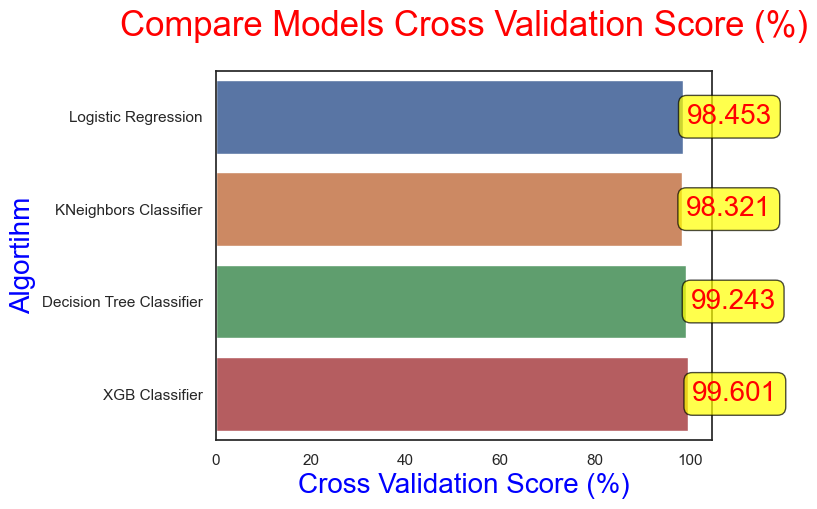

In [49]:
p = sns.set_theme(style="white")
p= models=result.sort_values(by='Cross Validation Score (%)',ascending=False)
p = sns.barplot(y= 'Algortihm', x= 'Cross Validation Score (%)', data= result)
for container in p.containers:
    p.bar_label(container,label_type = 'edge',padding = 3,size = 20,color = "Red",rotation = 0,bbox={"boxstyle": "round", "pad": 0.3, "facecolor": "yellow", "edgecolor": "black", "alpha": .7})
plt.title('Compare Models Cross Validation Score (%)',fontsize = 25, pad = 25, color = 'Red')
plt.xlabel('Cross Validation Score (%)',fontsize = 20, color ='Blue')
plt.ylabel('Algortihm',fontsize = 20, color ='Blue');

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=6,
                        learning_rate=0.05,
                        n_estimators=200,  
                        scale_pos_weight=0.5,
                        random_state=21)
# Train the XGBoost classifier
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=21, ...)

In [51]:
y_pred = xgb.predict(X_test)
acc_score=accuracy_score(y_test,y_pred)
print(f"\033[94m\033[1m")
print("Accuracy Score:",acc_score)
RF_score=cross_val_score(xgb,X_train,y_train,cv=10)
cv_score=RF_score.mean().round(5)*100
print(f"\033[91m\033[1m")
print("Mean cross val Score:",cv_score,'%')


Accuracy Score: 0.995895330938943

Mean cross val Score: 99.62299999999999 %


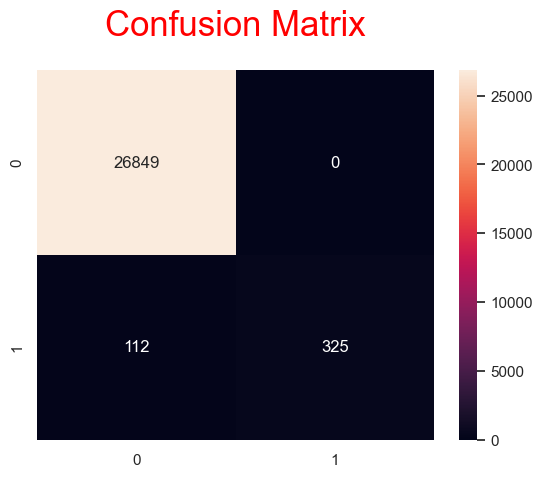

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt="d");
print(f"\033[91m\033[1m")
plt.title('Confusion Matrix',fontsize = 25, pad = 25, color = 'Red');

In [53]:
from sklearn.metrics import classification_report
print(f"\033[91m\033[1m")
print("Classification Report")
print(f"\033[94m\033[1m")
print(classification_report(y_test, y_pred))


Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26849
           1       1.00      0.74      0.85       437

    accuracy                           1.00     27286
   macro avg       1.00      0.87      0.93     27286
weighted avg       1.00      1.00      1.00     27286



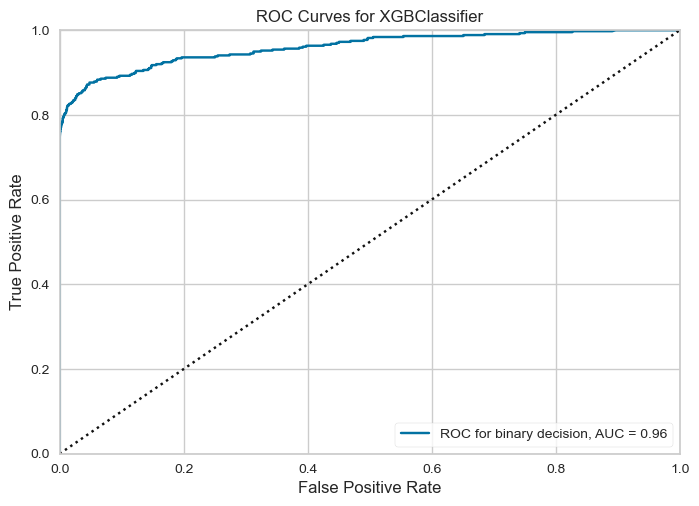

In [54]:
from yellowbrick.classifier import ROCAUC
viz = ROCAUC(xgb,binary=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();   

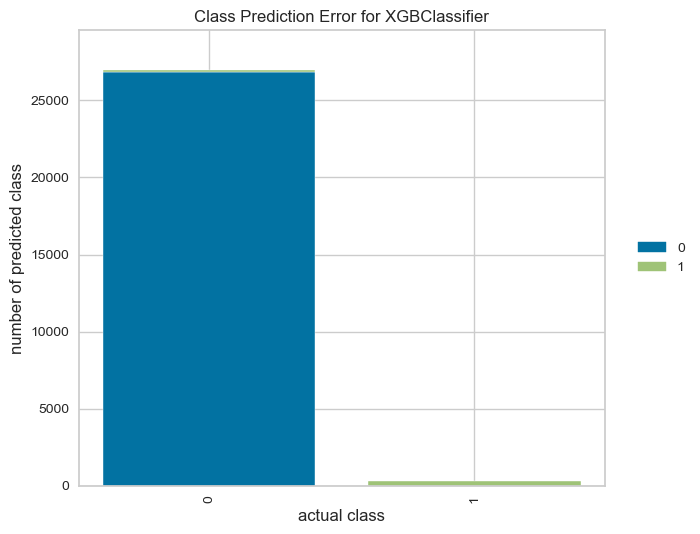

In [55]:
from yellowbrick.classifier import ClassPredictionError
viz = ClassPredictionError(xgb)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show(); 

### Test dataset

In [56]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()

(90954, 13)


,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [57]:
test.columns =test.columns.str.replace('[\[\]]', '', regex=True)
test.head()

,id,Product ID,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [58]:
df_test = test.drop(columns=['Product ID'],axis=1)
df_test.head()

,id,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,TWF,HDF,PWF,OSF,RNF
0,136429,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [59]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_test['Type'] = encoder.fit_transform(df_test['Type'])
df_test.head(5)

,id,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,TWF,HDF,PWF,OSF,RNF
0,136429,1,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,1,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,1,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,2,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,2,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [60]:
y_test_pred = xgb.predict(df_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
final = pd.DataFrame({'id': df_test.id, 'Machine failure': y_test_pred})
final.to_csv('Final.csv', index = False )

In [62]:
final.sample(10)

,id,Machine failure
59179,195608,0
12016,148445,0
16928,153357,0
88914,225343,0
24937,161366,0
69181,205610,0
12882,149311,0
72948,209377,0
54257,190686,0
46090,182519,0


In [63]:
final['Machine failure'].value_counts().to_frame()

,Machine failure
0,89847
1,1107
